In [1]:
import os
import sys
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Data path
if sys.platform == "darwin":
    dataPath = "/Users/jwh/Desktop/0919/Test2/result/"
else:
    dataPath = ""

In [3]:
# Read Data
fileNames = [file for file in sorted(glob.glob(dataPath + "*.csv")) if os.path.isfile(file)]

In [4]:
fileIdx = [31, 32, 33,                  # class 1
           58, 59, 60,                  # class 2
           61, 62, 63,                  # class 3
           64, 65, 66,                  # class 4
           67, 68, 69,                  # class 5
           70, 71, 72,                  # class 6
           73, 74, 75,                  # class 7
           76, 77, 78,                  # class 8
           79, 80, 81,                  # class 9
           1, 2, 3,                     # class 10
           4, 5, 6,                     # class 11
           7, 8, 9,                     # class 12
           10, 11, 12,                  # class 13
           13, 14, 15,                  # class 14
           16, 17, 18,                  # class 15
           19, 20, 21,                  # class 16
           22, 23, 24,                  # class 17
           25, 26, 27,                  # class 18
           28, 29, 30,                  # class 19
           34, 35, 36,                  # class 20
           37, 38, 39,                  # class 21
           40, 41, 42,                  # class 22
           43, 44, 45,                  # class 23
           46, 47, 48,                  # class 24
           49, 50, 51,                  # class 25
           52, 53, 54,                  # class 26
           55, 56, 57]                  # class 27

In [5]:
files = []
for idx in fileIdx:
    caseData = pd.read_csv(fileNames[idx], sep= ",")
    files.append(caseData)

In [6]:
base = pd.read_csv(fileNames[0], sep= ",")
meanBase = pd.DataFrame(base.mean(axis= 0))
meanBase.head()

,0
s1,-828.26300
s2,-854.03200
s3,-886.97450
s4,756.29175
s5,744.35150


In [7]:
sensorNames = [f"s{i}" for i in np.arange(1, 7, 1)]

In [8]:
def getScaledData(df):
    res = []
    for i in range(6):
        res.append(df.iloc[:, i] - meanBase.iloc[i, 0])
    res = np.array(res).reshape(6, -1).T
    res = pd.DataFrame(res, columns= sensorNames)
    return res

In [9]:
scaledData = []
for i in range(len(files)):
    scaled = getScaledData(files[i])
    scaledData.append(scaled)

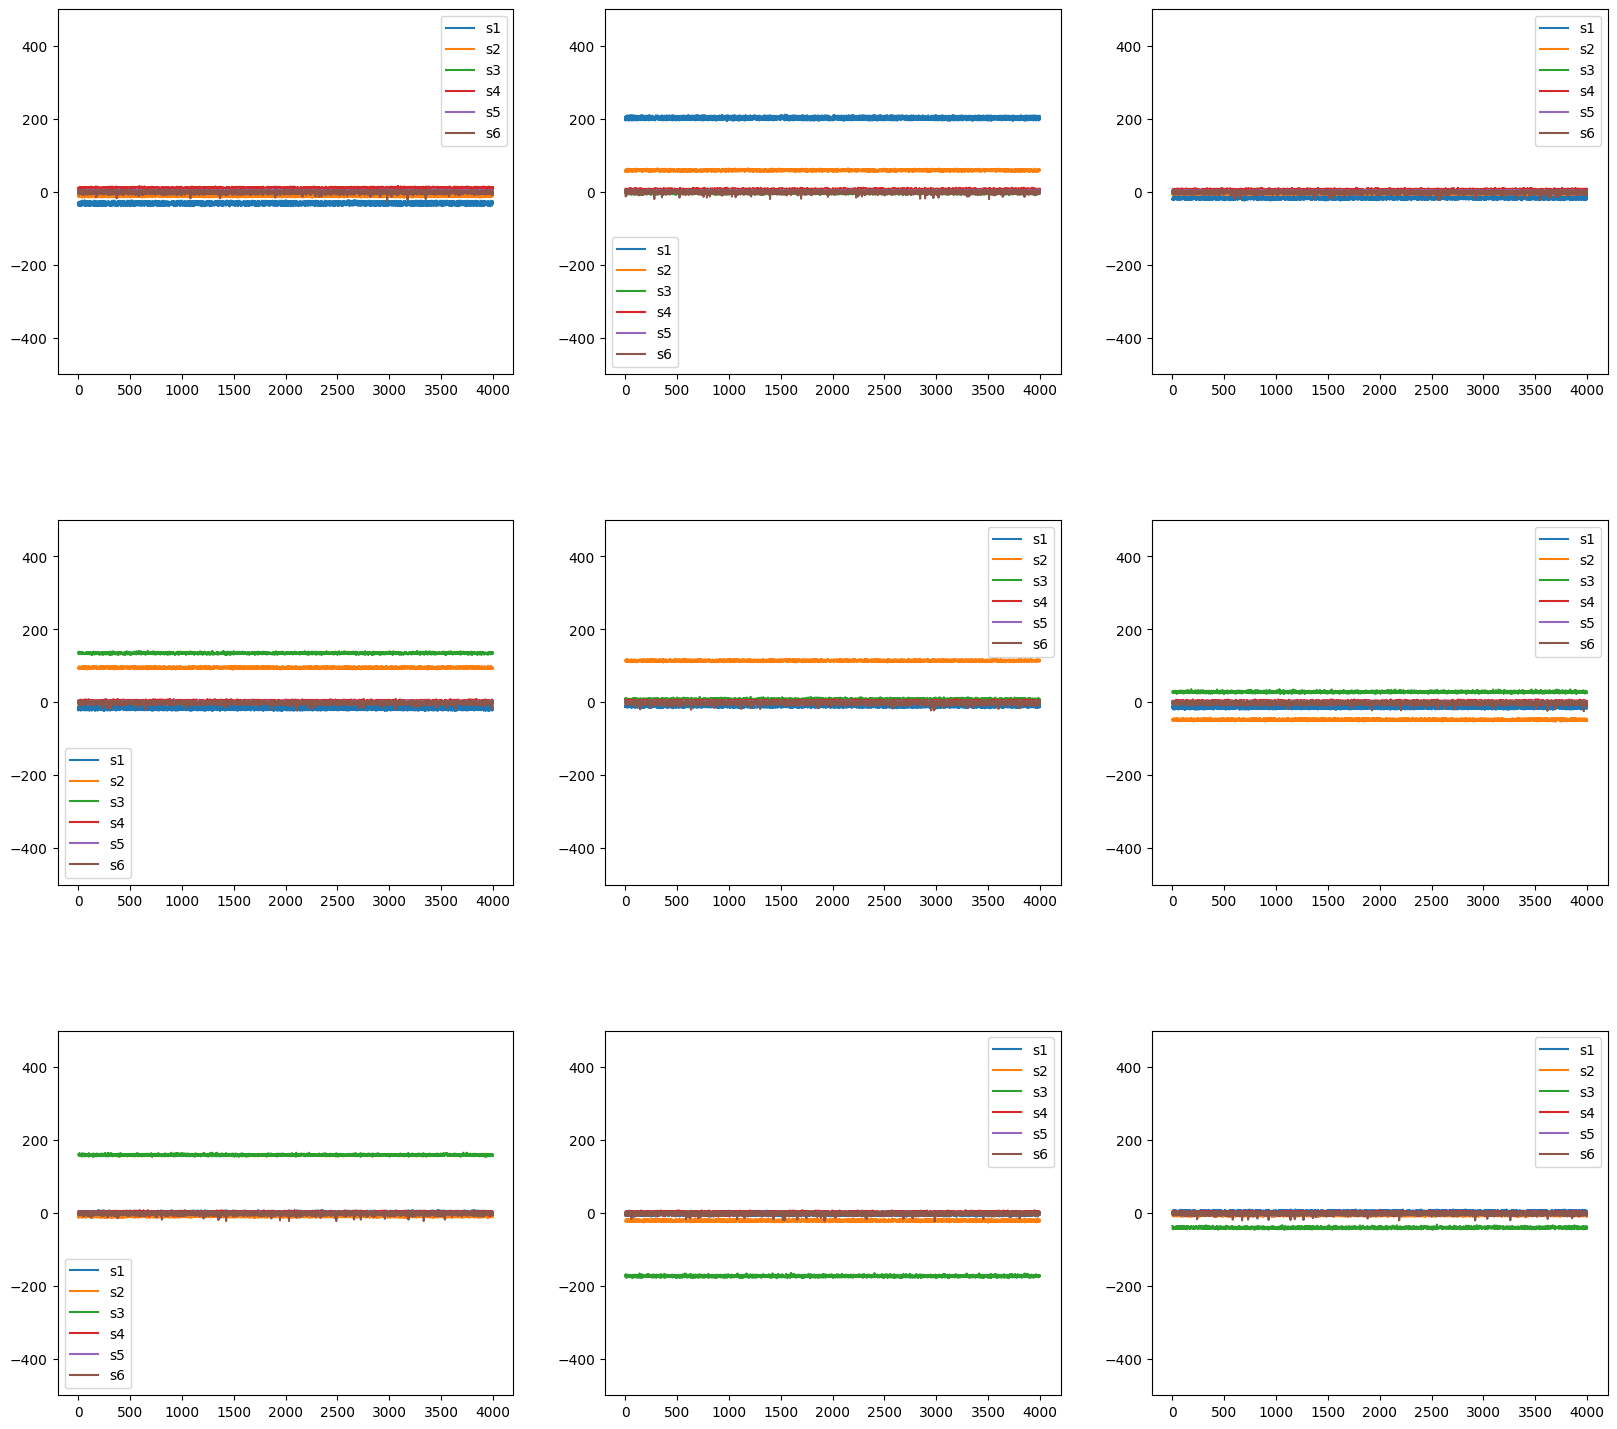

In [11]:
yMin = -500
yMax = 500
yLim = [yMin, yMax]

fig, axs = plt.subplots(3, 3, figsize= (20, 18))
for i, ax in enumerate(axs.flat):
    scaledData[i].plot(kind= "line",
                       ax= ax,
                       ylim= yLim,
                    #    title= f"Case {i+1}",
                       ).legend()
plt.subplots_adjust(hspace= 0.4)
plt.show()

In [12]:
meanScaled = [scaledData[i].mean(axis= 0) for i in range(len(scaledData))]

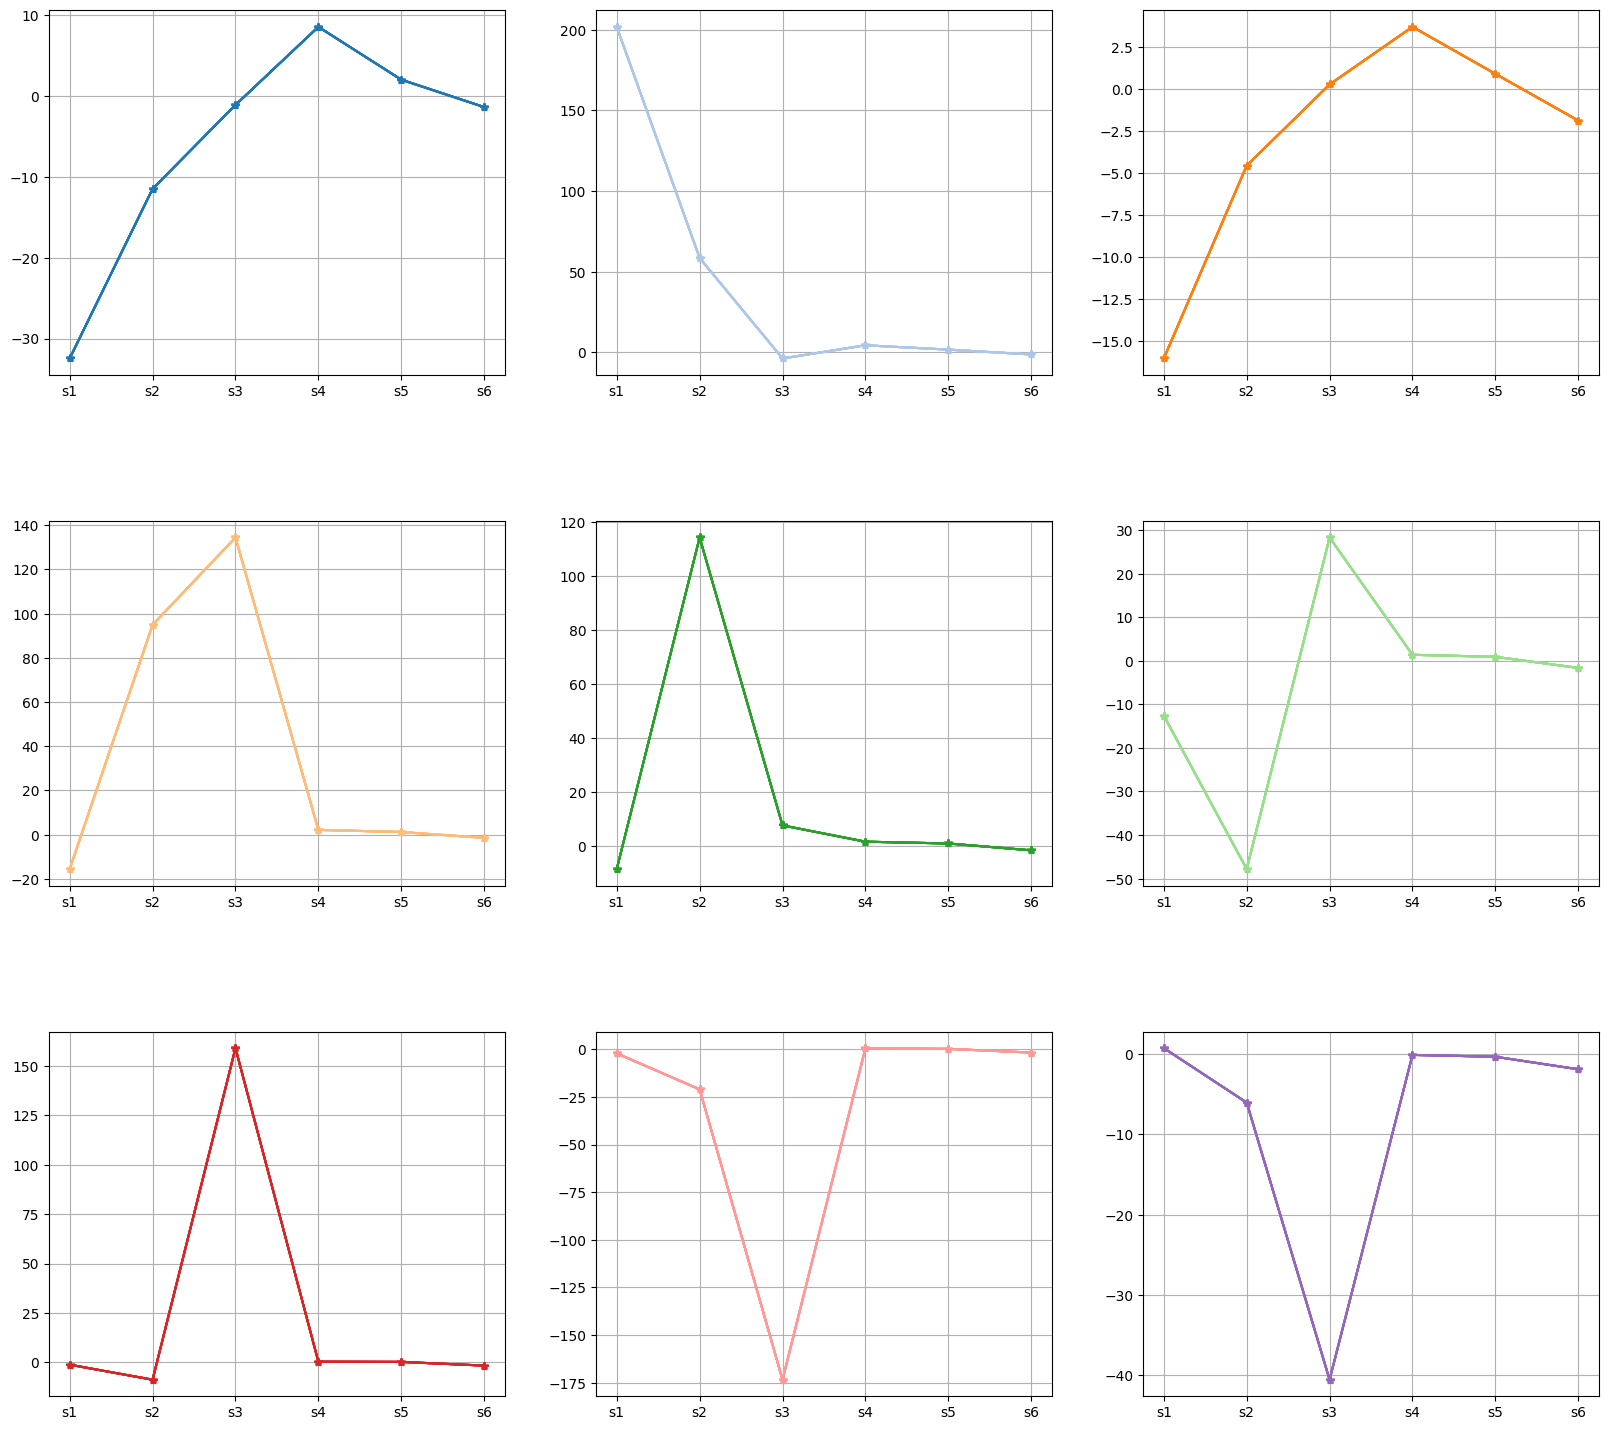

In [13]:
import matplotlib

fig, axs = plt.subplots(3, 3, figsize= (20, 18))
cmap = matplotlib.colormaps.get_cmap('tab20')
colors = [cmap(i) for i in range(9)]

yLimit = [-2400, 2400]

for i, ax in enumerate(axs.flat):
    for sensor in sensorNames:
        meanScaled[i].plot(kind= "line",
                           ax= ax,
                           grid= True,
                           marker= "*",
                           color= colors[i])
plt.subplots_adjust(hspace= 0.4)
plt.show()